<a href="https://colab.research.google.com/github/ABanc04/BME3053C-Spring-2025/blob/main/lessons-solved/Homework7_ABancalari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [3]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse


    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

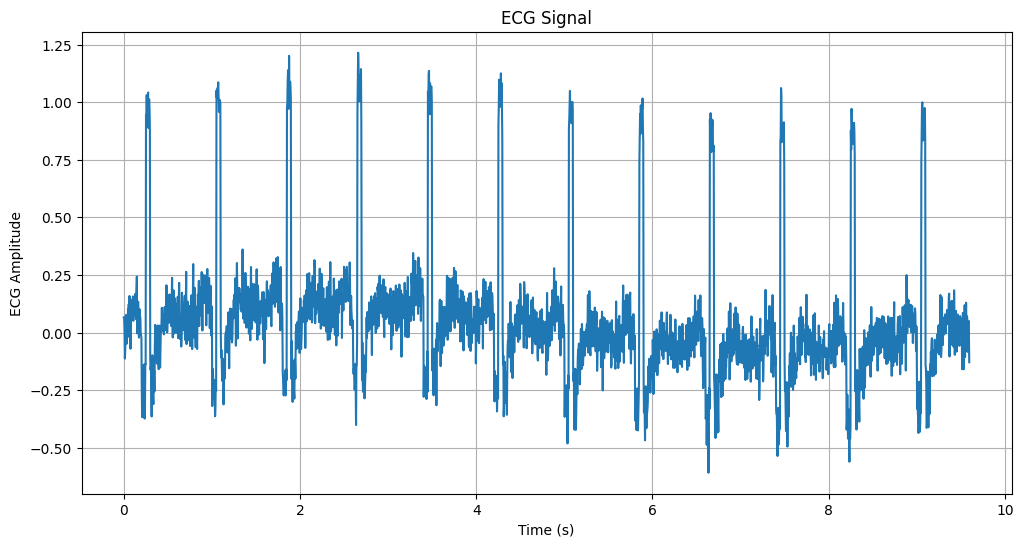

In [13]:
# prompt: Generate the ECG data and use plt.plot() to visualize it.
# Label the x-axis as "Time (s)" and the y-axis as "ECG Amplitude".
# Provide a title and add grid lines for clarity.
# Hint: Time can be computed as np.arange(len(ecg_data)) / sampling_rate.
# and make the graph blue

sampling_rate = 250
time = np.arange(len(ecg_data)) / sampling_rate
plt.figure(figsize=(12, 6))  # best visual
plt.plot(time, ecg_data)


plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("ECG Signal")
plt.grid(True)
plt.show()


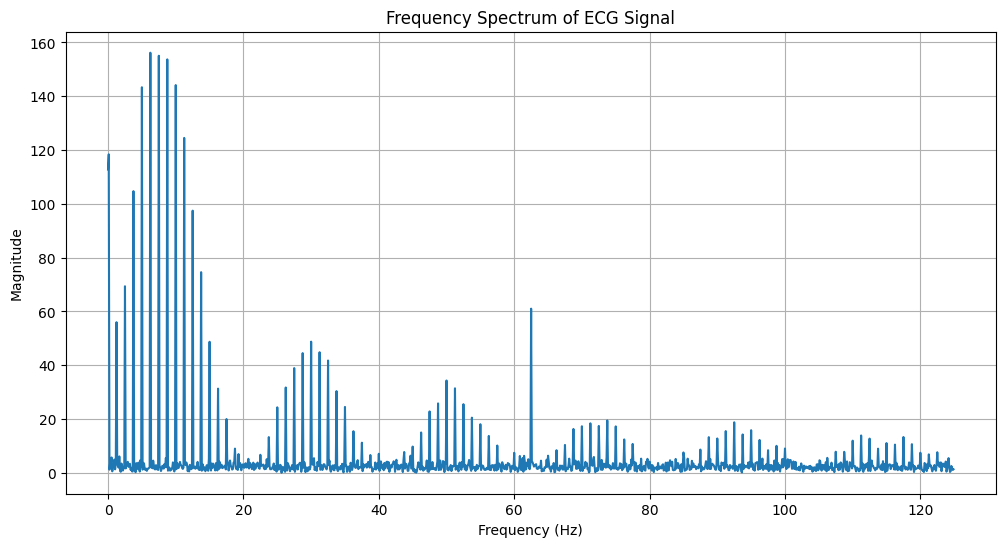

In [5]:
#Compute and plot the Fourier transform of the ECG signal to explore its frequency components.
# Use fft() to compute the Fourier transform.
# Plot the magnitude of the Fourier transform against the frequency, but show only the positive frequencies.
# Label your axes appropriately (e.g., "Frequency (Hz)" vs. "Magnitude").
# Hint: You can derive the frequency array using np.fft.fftfreq() and ensure you handle the symmetry of the FFT output by plotting only the first half of the spectrum.

# Compute the Fourier Transform
fft_ecg = fft(ecg_data)

# Calculate the frequencies corresponding to the FFT values
frequencies = np.fft.fftfreq(len(ecg_data), 1/sampling_rate)

# Plot the magnitude spectrum (positive frequencies only)
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_ecg)[:len(frequencies)//2]) #plot only first half /2
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of ECG Signal")
plt.grid(True)
plt.show()


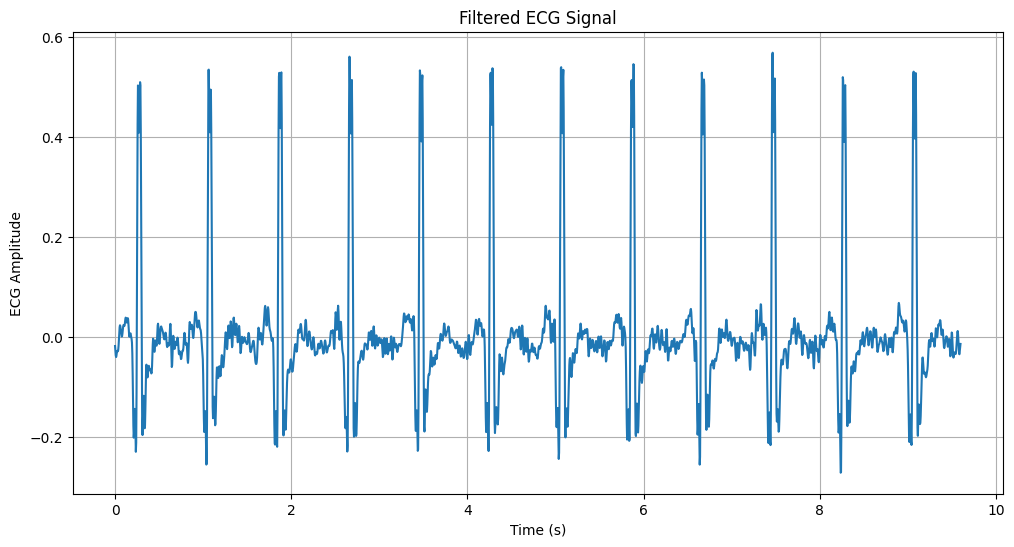

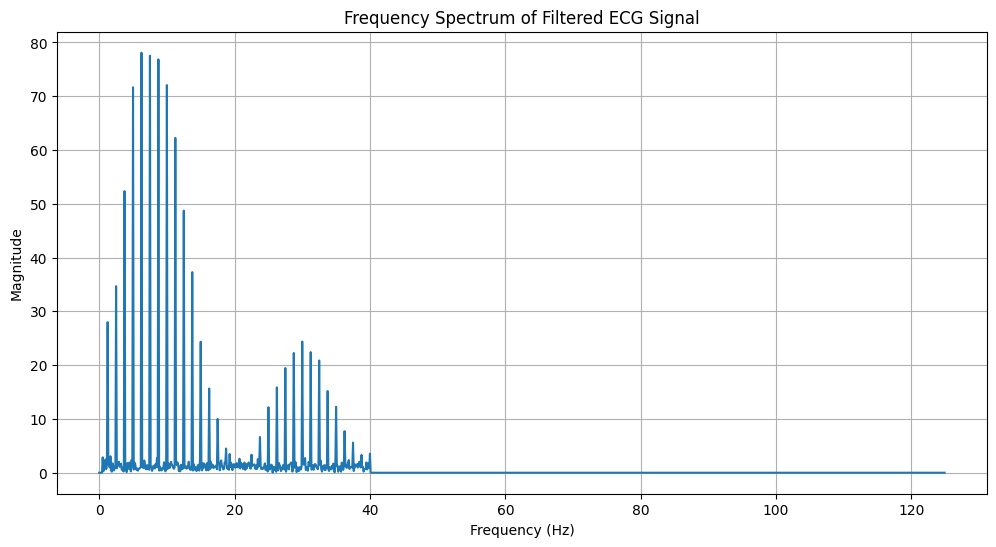

In [6]:
# prompt: Task: Design and apply a bandpass filter to remove noise and retain key frequencies in the ECG signal.
# In the frequency domain, create a mask to preserve only frequencies within a physiological range (e.g., 0.5 Hz to 40 Hz).
# Apply the mask to the Fourier-transformed signal and then reconstruct the filtered ECG using the inverse Fourier transform ifft().

# Define the bandpass filter (0.5 Hz to 40 Hz)
low_cutoff = 0.5
high_cutoff = 40

# Create a mask in the frequency domain
mask = (frequencies >= low_cutoff) & (frequencies <= high_cutoff)

# Apply the mask to the Fourier-transformed signal
fft_ecg_filtered = fft_ecg * mask

# Reconstruct the filtered ECG signal using the inverse Fourier transform
ecg_filtered = ifft(fft_ecg_filtered).real

# Plot the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_filtered)
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal")
plt.grid(True)
plt.show()

# Compute the Fourier Transform of the filtered signal
fft_ecg_filtered = fft(ecg_filtered)

# Plot the magnitude spectrum of the filtered signal (positive frequencies only)
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_ecg_filtered)[:len(frequencies)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Filtered ECG Signal")
plt.grid(True)
plt.show()


Heart Rate: 75.17 BPM


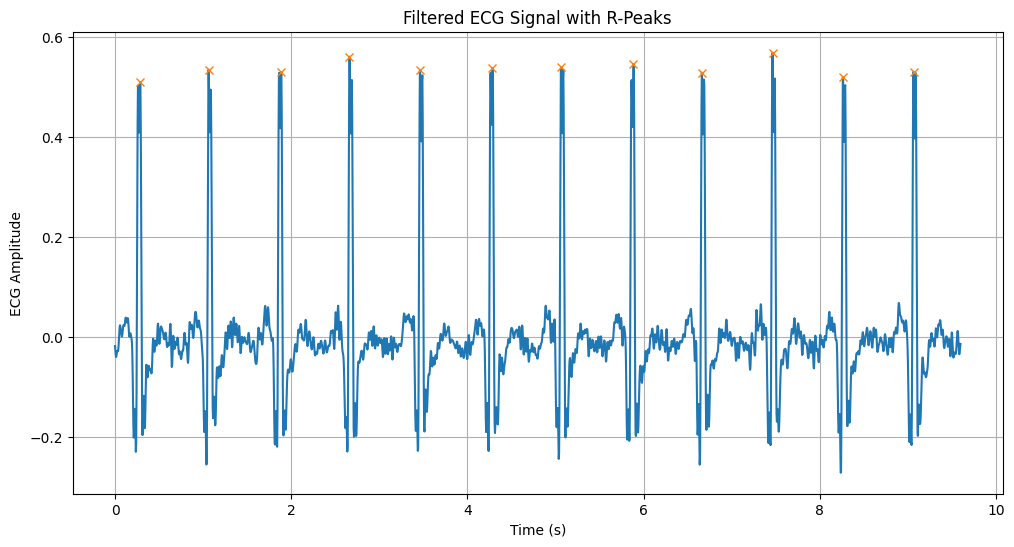

In [14]:
# prompt: Task: Calculate the heart rate from the filtered ECG signal.
# Use find_peaks() to detect the R-peaks in the filtered ECG signal (in the time domain).
# Calculate the time intervals between successive R-peaks and use these intervals to compute the heart rate in beats per minute (BPM).
# Hint: The average interval between peaks (in seconds) can be used to calculate BPM as 60 / average_interval.

# Find R-peaks in the filtered ECG signal
peaks, _ = find_peaks(ecg_filtered, height=0.5, distance=10) # Adjust height and distance as needed


# Calculate the time intervals between R-peaks
time_intervals = np.diff(peaks) / sampling_rate


# Calculate the heart rate in BPM
heart_rate = 60 / np.mean(time_intervals)


print(f"Heart Rate: {heart_rate:.2f} BPM")


# Plot the filtered ECG with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_filtered)
plt.plot(peaks / sampling_rate, ecg_filtered[peaks], "x")  # Mark R-peaks on the plot
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("Filtered ECG Signal with R-Peaks")
plt.grid(True)
plt.show()


Written summary:

The first graph shows the original ECG signal with all the noise stemming from utilization of the equipment. Then a Fast Fourier Transform was used to break down the ECG signal into a frequency domain. A bandpass filter of 0.5 Hz to 40 Hz was desgined to remove unwanted noise. R-peaks were then identified in the final filtered signal, which reflect heartbeats that can ultimately be used to calculate average heart rate. Utilizing the time between R-peaks, one can accurately measure the heart rate of the patient. The final graph, which denotes the R-peaks on a filtered signal, displays the final heart rate of about 75 BPM calculated from the given data.





